<a href="https://colab.research.google.com/github/aashish10raj/GFG_21Projects_Course/blob/main/Project8/8_Vision_AI_Fundamentals_Building_a_Digit_Recognizer_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST Classification Project

This project aims to build and compare different deep learning models for classifying images from the Fashion-MNIST dataset. We will explore the impact of increasing model complexity, from a simple Artificial Neural Network (ANN) to more sophisticated Convolutional Neural Networks (CNNs), on performance and efficiency.

**Project Agenda & Steps:**

1.  **Dataset Setup:**
    *   Import necessary libraries.
    *   Load the Fashion-MNIST dataset.
    *   Preprocess the data (normalize and reshape images, one-hot encode labels).
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Define the architecture for each model:
        *   Basic ANN Model
        *   Basic CNN Model
        *   Deeper CNN Model

3.  **Model Training:**
    *   Train each model using the prepared training data.
    *   Implement Early Stopping and Model Checkpointing to optimize training and save the best model weights.

4.  **Model Evaluation:**
    *   Load the best weights for each trained model.
    *   Evaluate each model's performance on the test set using metrics like loss and accuracy.
    *   Visualize the training history (accuracy and loss curves) for comparison.
    *   Generate and visualize confusion matrices to understand model performance on each class.

5.  **Prediction Analysis:**
    *   Use the best performing model (Basic CNN in this case) to make predictions on the test set.
    *   Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behavior.

**Goal:** To analyze and demonstrate how model complexity influences classification accuracy and efficiency on the Fashion-MNIST dataset.

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [22]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [23]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### 1.4) Reshape Data

Reshape images to **28×28×1** by adding a channel dimension, making them compatible with CNN layers.  

**Example:**  
- Before: `(60000, 28, 28)` → 60,000 grayscale images without channel info  
- After: `(60000, 28, 28, 1)` → channel dimension (`1`) added for CNN input  


In [24]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#### 1.5) One-Hot Encode Labels

Convert class labels (0–9) into **one-hot encoded vectors** with 10 output classes, required for multi-class classification.  

**Example:**  
- Original label: `3`  
- One-hot encoded: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`  


In [25]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(60000, 28, 28, 1)`  
- Testing images shape: `(10000, 28, 28, 1)`  
- Training labels shape: `(60000, 10)`  
- Testing labels shape: `(10000, 10)`  


In [26]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (60000, 28, 28, 1)
Testing images shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


### 2. Model Building

#### 2.1) Basic ANN Model

- **Flatten (28×28→784)** → 0 params  
- **Dense (128, ReLU)** → 100,480 params  
- **Dense (64, ReLU)** → 8,256 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~109K  

In [27]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model

- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 102,464 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~121K  

In [28]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 320 + 64 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 128 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 256 params  
- **Flatten**  
- **Dense (128, ReLU) + BN + Dropout** → 147,584 + 256 params  
- **Dense (10, Softmax)** → 1,290 params  

**Total params:** ~242K  

In [29]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,882 (437.04 KB)

 Trainable params: 111,178 (434.29 KB)

 Non-trainable params: 704 (2.75 KB)

### 3. Train models

#### 3.1) Training ANN Model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [30]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7709 - loss: 0.6708
Epoch 1: val_loss improved from inf to 0.41630, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7710 - loss: 0.6706 - val_accuracy: 0.8512 - val_loss: 0.4163
Epoch 2/30
917/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.3831
Epoch 2: val_loss improved from 0.41630 to 0.39531, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8626 - loss: 0.3829 - val_accuracy: 0.8551 - val_loss: 0.3953
Epoch 3/30
926/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8760 - loss: 0.3424
Epoch 3: val_loss improved from 0.39531 to 0.37233, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8760 - loss: 0.3423 - val_accuracy: 0.8685 - val_loss: 0.3723
Epoch 4/30
932/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

#### 3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [31]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7486 - loss: 0.6984
Epoch 1: val_loss improved from inf to 0.40122, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7487 - loss: 0.6982 - val_accuracy: 0.8527 - val_loss: 0.4012
Epoch 2/30
923/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8728 - loss: 0.3534
Epoch 2: val_loss improved from 0.40122 to 0.33030, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8729 - loss: 0.3530 - val_accuracy: 0.8818 - val_loss: 0.3303
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8925 - loss: 0.2957
Epoch 3: val_loss improved from 0.33030 to 0.29882, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8925 - loss: 0.2957 - val_accuracy: 0.8943 - val_loss: 0.2988
Epoch 4/30
924/938 ━━━━━━━━━━━━━━━━━━━━ 0s 

#### 3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [32]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6478 - loss: 1.0443
Epoch 1: val_loss improved from inf to 0.44266, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.6479 - loss: 1.0440 - val_accuracy: 0.8400 - val_loss: 0.4427
Epoch 2/30
934/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8211 - loss: 0.5054
Epoch 2: val_loss improved from 0.44266 to 0.43951, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8211 - loss: 0.5053 - val_accuracy: 0.8376 - val_loss: 0.4395
Epoch 3/30
935/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8429 - loss: 0.4437
Epoch 3: val_loss improved from 0.43951 to 0.43143, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8429 - loss: 0.4437 - val_accuracy: 0.8415 - val_loss: 0.4314
Epoch 4/30
937/938 ━━━━━━━━━━━━━━━━━

### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

/tmp/ipython-input-2215778233.py:42: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.



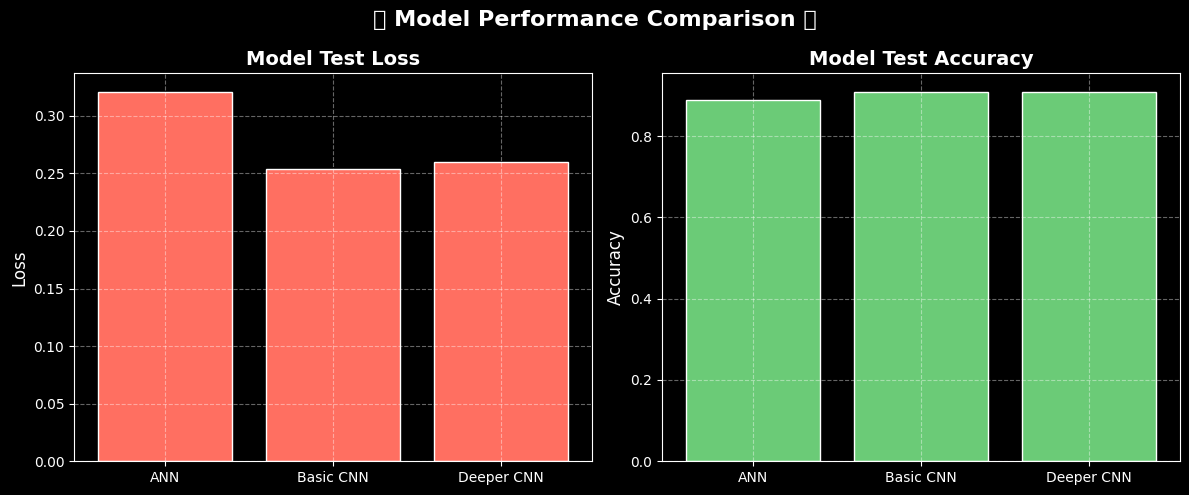

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


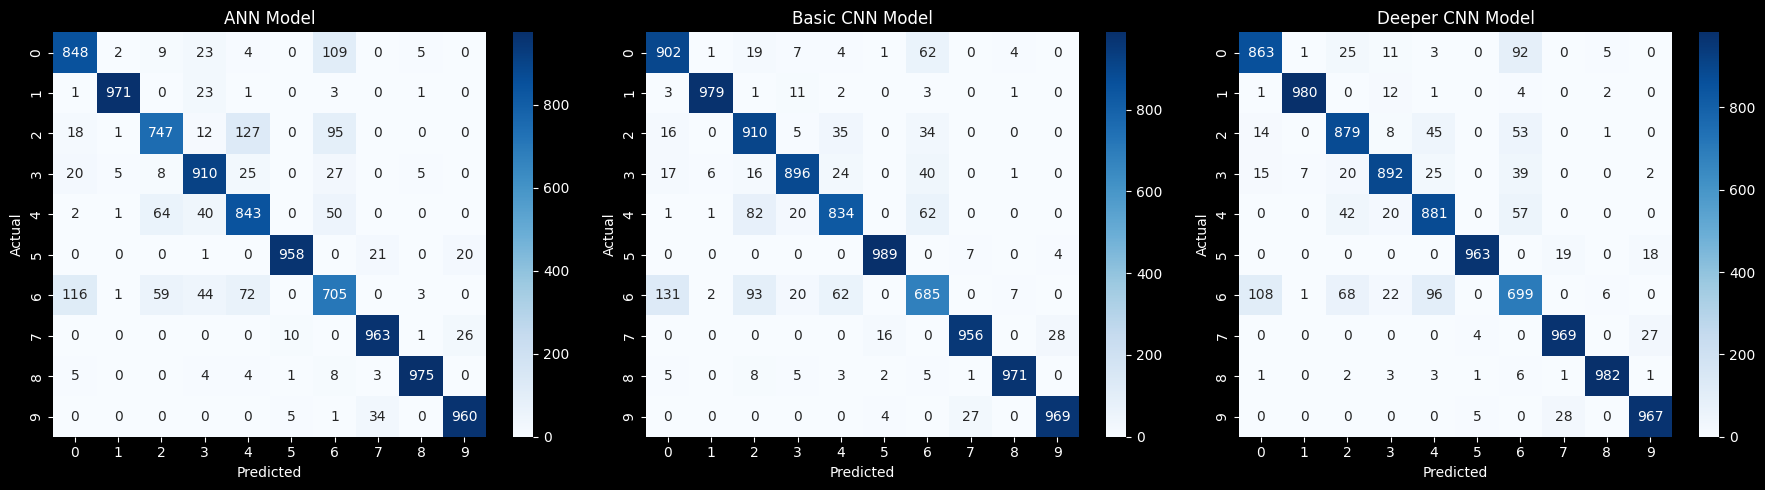

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

#### 4.4) Predictions

This code:
- Uses the trained **Basic CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).  


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


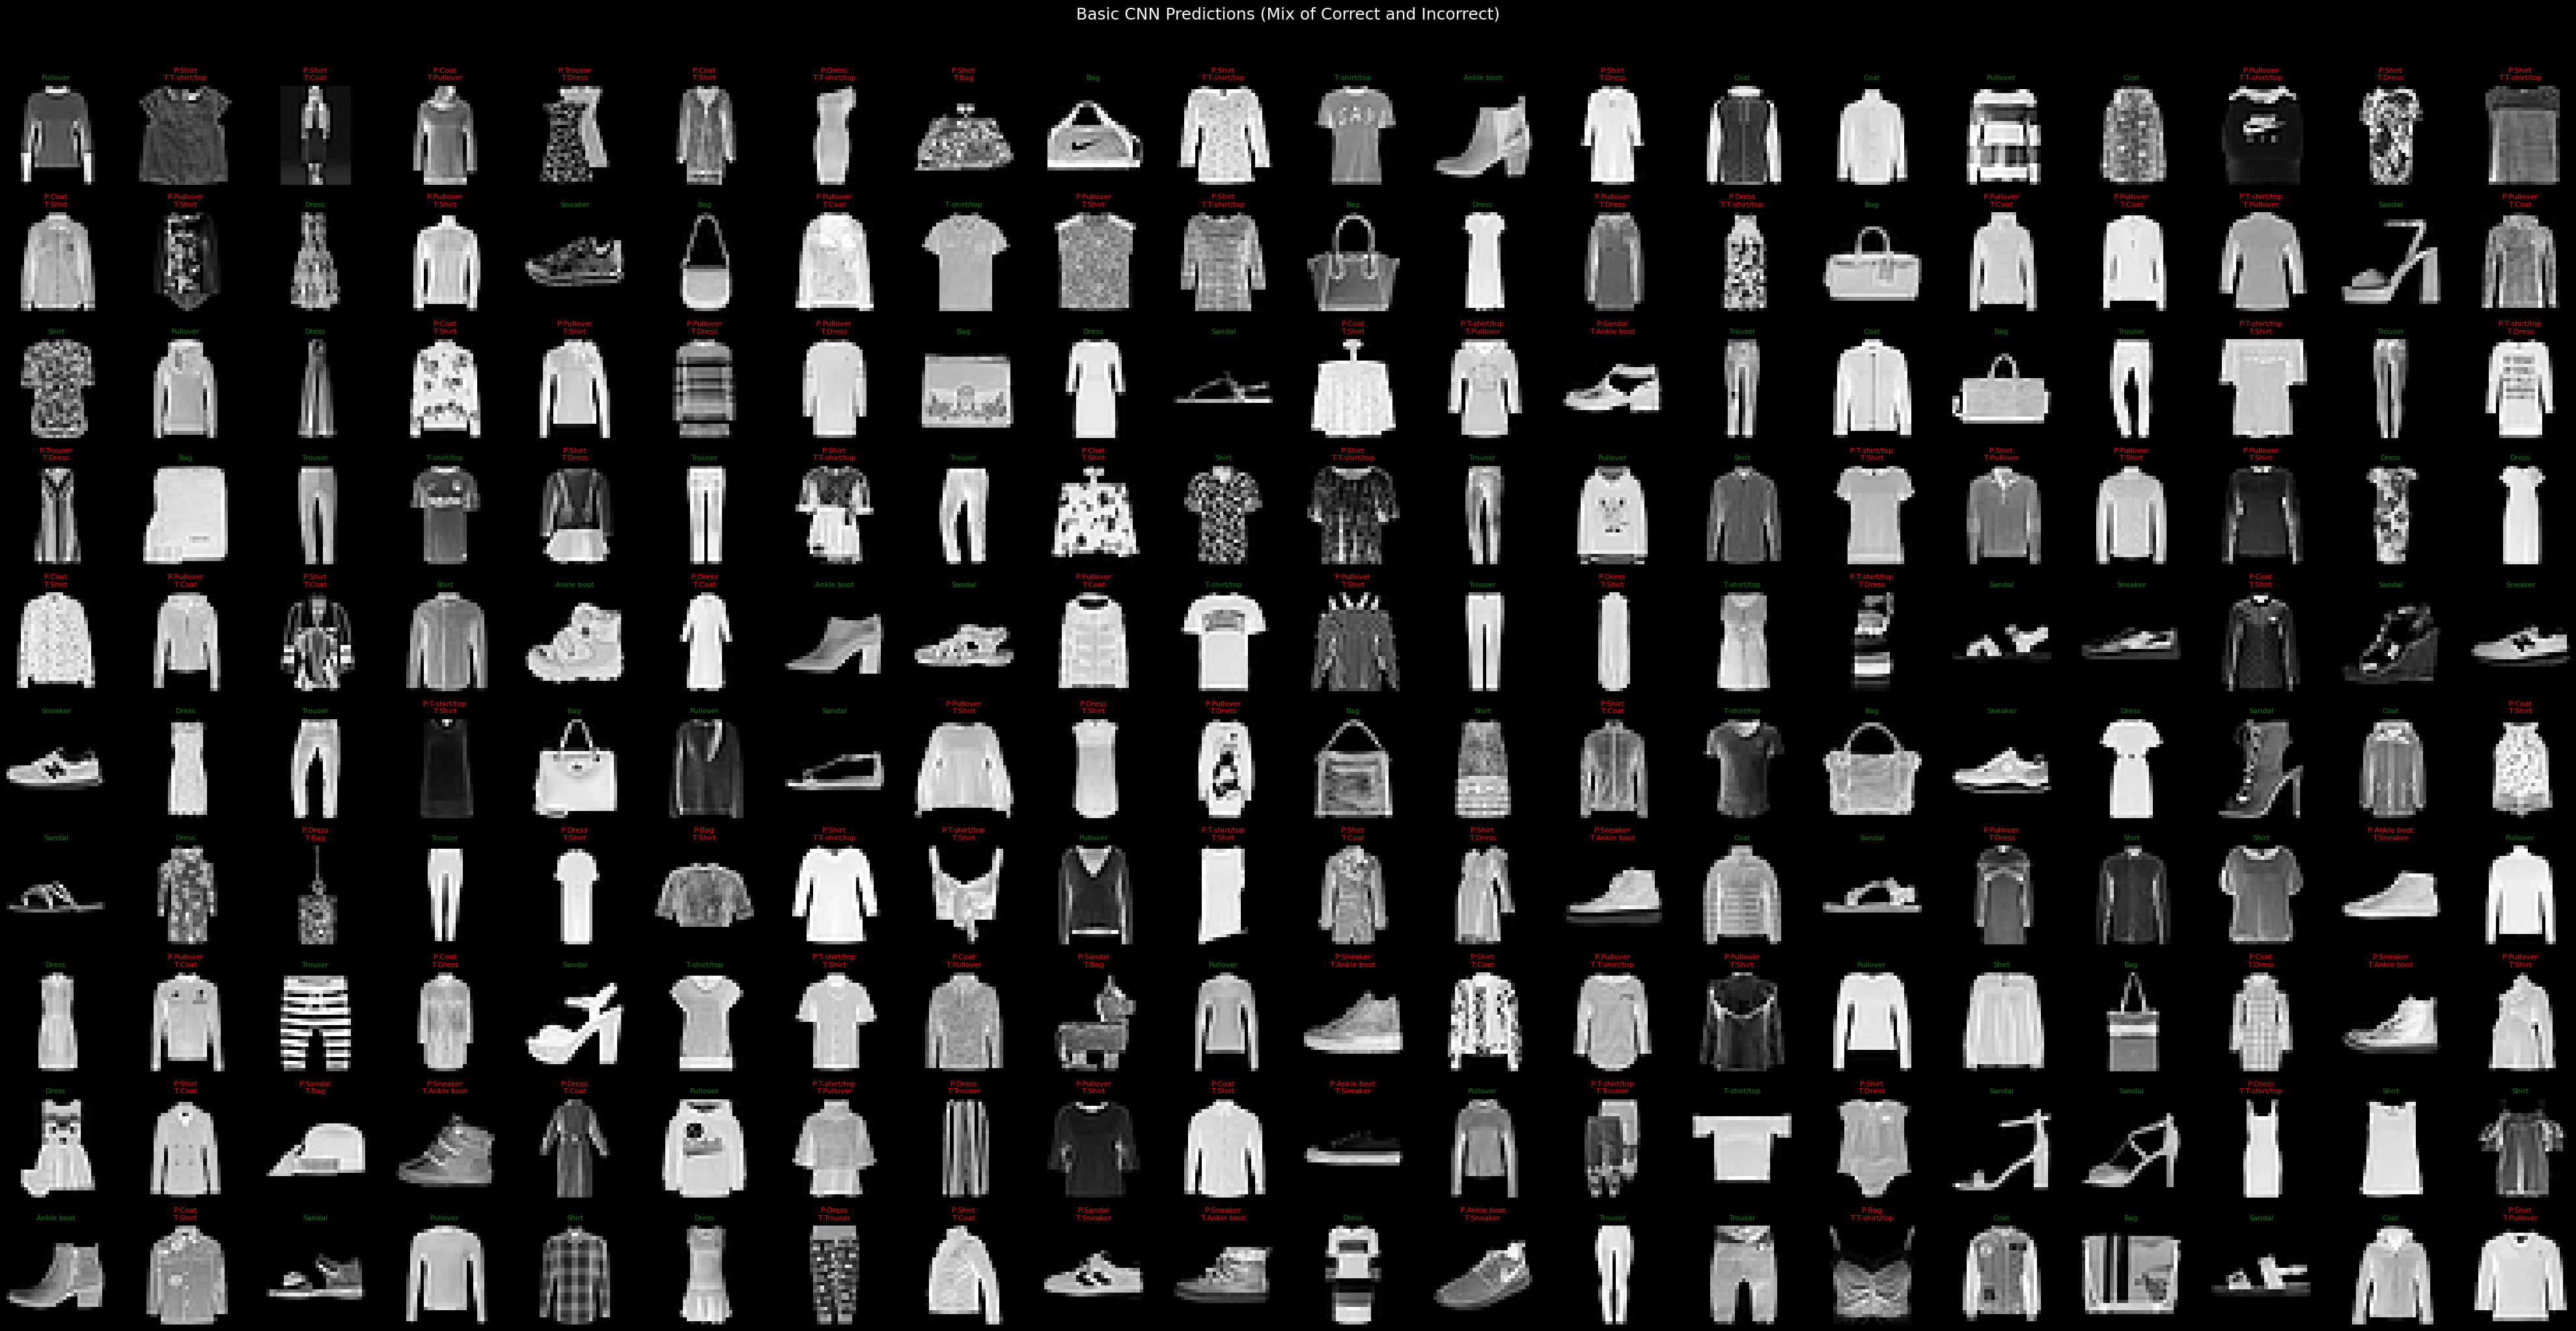

In [36]:
basic_cnn_predictions = basic_cnn_model.predict(test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(basic_cnn_predicted_labels == test_labels)[0]
incorrectly_classified_indices = np.where(basic_cnn_predicted_labels != test_labels)[0]

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(test_images[idx].reshape(28, 28), cmap='gray')

    pred = class_names[basic_cnn_predicted_labels[idx]]
    true = class_names[test_labels[idx]]

    if basic_cnn_predicted_labels[idx] == test_labels[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (ANN, Basic CNN, and Deeper CNN) for classifying images from the Fashion-MNIST dataset.

**Summary of Work:**

1.  **Data Preparation:** The Fashion-MNIST dataset was loaded, normalized, reshaped, and one-hot encoded, preparing it for use with the different model architectures.
2.  **Model Development:** Three models of increasing complexity were defined: a basic Artificial Neural Network (ANN), a basic Convolutional Neural Network (CNN), and a deeper CNN with additional layers, batch normalization, and dropout.
3.  **Model Training:** Each model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4.  **Model Evaluation:** The trained models were evaluated on the test set. Performance metrics (loss and accuracy) were calculated, and the training history was visualized. Confusion matrices were generated to analyze class-specific performance.
5.  **Prediction Analysis:** Predictions were made using the Basic CNN model, and examples of correctly and incorrectly classified images were visualized to gain insights into the model's strengths and weaknesses.

**Key Findings and Conclusion:**

Based on the evaluation results:

*   The **Basic CNN model** generally achieved the best balance of performance (highest accuracy, lowest loss) on the test set compared to the ANN and Deeper CNN models.
*   The **ANN model** performed reasonably well but was outperformed by both CNN architectures, highlighting the advantage of convolutional layers for image classification tasks.
*   The **Deeper CNN model**, despite its increased complexity, did not consistently outperform the Basic CNN model on this dataset. This could be due to various factors such as the dataset size, the architecture choices, or the regularization applied. For this particular task and dataset, the increased complexity of the deeper model might not have been necessary or could have led to some overfitting despite the regularization techniques.

In conclusion, the Basic CNN model demonstrated superior performance for this Fashion-MNIST classification task, suggesting that a moderate level of complexity with convolutional layers is effective for this dataset. Further tuning of hyperparameters or architectural variations might potentially improve performance across all models, but the current results clearly show the benefits of CNNs over ANNs for image data.

## Assignment: CIFAR-100 Image Classification

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

### 2. Model Building (CIFAR-100)

#### 2.1) Basic ANN Model (CIFAR-100)

Adapting the ANN for CIFAR-100:
- **Flatten (32x32x3 → 3072)** → 0 params
- **Dense (128, ReLU)** → 393,344 params
- **Dense (64, ReLU)** → 8,256 params
- **Dense (100, Softmax)** → 6,500 params (100 classes for CIFAR-100)

**Total params:** ~408K

In [39]:
ann_model_cifar100 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax') # 100 classes for CIFAR-100
])

ann_model_cifar100.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

ann_model_cifar100.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408,100 (1.56 MB)

 Trainable params: 408,100 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model (CIFAR-100)

Adapting the Basic CNN for CIFAR-100:
- **Conv2D (32, 3×3) + MaxPool** → 896 params
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params
- **Flatten**
- **Dense (128, ReLU)** → 262,272 params
- **Dense (100, Softmax)** → 12,900 params

**Total params:** ~294K

In [40]:
basic_cnn_model_cifar100 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'), # Increased dense units
    keras.layers.Dense(100, activation='softmax') # 100 classes for CIFAR-100
])

basic_cnn_model_cifar100.compile(optimizer='adam',
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

basic_cnn_model_cifar100.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,332 (1.25 MB)

 Trainable params: 327,332 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model (CIFAR-100)

Adapting the Deeper CNN for CIFAR-100:
- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 896 + 128 params
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 36,928 + 256 params
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 147,584 + 512 params
- **Flatten**
- **Dense (256, ReLU) + BN + Dropout** → 819,456 + 1024 params
- **Dense (100, Softmax)** → 25,700 params

**Total params:** ~1.03M

### 3. Train models (CIFAR-100)

#### 3.1) Training ANN Model (CIFAR-100)

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_cifar100_weights.weights.h5`) based on validation loss.
- **Training**:
  - Epochs: up to 30 (early stopping controls actual run)
  - Batch size: 64
  - Validation on test set
  - Callbacks: EarlyStopping + ModelCheckpoint

In [42]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann_cifar100 = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_cifar100_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model for CIFAR-100...")
ann_history_cifar100 = ann_model_cifar100.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint_ann_cifar100]
)
print("ANN model training finished for CIFAR-100.")

Training ANN model for CIFAR-100...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0294 - loss: 4.4558
Epoch 1: val_loss improved from inf to 3.94813, saving model to best_ann_model_cifar100_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0294 - loss: 4.4556 - val_accuracy: 0.0926 - val_loss: 3.9481
Epoch 2/30
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1093 - loss: 3.8576
Epoch 2: val_loss improved from 3.94813 to 3.73375, saving model to best_ann_model_cifar100_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1094 - loss: 3.8570 - val_accuracy: 0.1308 - val_loss: 3.7338
Epoch 3/30
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1342 - loss: 3.7008
Epoch 3: val_loss improved from 3.73375 to 3.65626, saving model to best_ann_model_cifar100_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1342 - loss: 3.7006 - val_accuracy: 0.1448 - val_loss: 3.6563
Epoch 4/30
779/782 ━━━━━━━

#### 3.2) Training Basic CNN Model (CIFAR-100)

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_cifar100_weights.weights.h5`) based on validation loss.
- **Training**:
  - Epochs: up to 30 (early stopping controls actual run)
  - Batch size: 64
  - Validation on test set
  - Callbacks: EarlyStopping + ModelCheckpoint

In [43]:
model_checkpoint_basic_cnn_cifar100 = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_cifar100_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model for CIFAR-100...")
basic_cnn_history_cifar100 = basic_cnn_model_cifar100.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint_basic_cnn_cifar100]
)
print("Basic CNN model training finished for CIFAR-100.")

Training Basic CNN model for CIFAR-100...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0684 - loss: 4.1877
Epoch 1: val_loss improved from inf to 3.39136, saving model to best_basic_cnn_model_cifar100_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.0685 - loss: 4.1873 - val_accuracy: 0.1920 - val_loss: 3.3914
Epoch 2/30
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2201 - loss: 3.2609
Epoch 2: val_loss improved from 3.39136 to 3.09278, saving model to best_basic_cnn_model_cifar100_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2204 - loss: 3.2593 - val_accuracy: 0.2531 - val_loss: 3.0928
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2943 - loss: 2.8667
Epoch 3: val_loss improved from 3.09278 to 2.90557, saving model to best_basic_cnn_model_cifar100_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2943 - loss: 2.8666 - val_accuracy: 0.2890 - val_loss: 2.9056
Ep

#### 3.3) Training Deeper CNN Model (CIFAR-100)

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_cifar100_weights.weights.h5`) based on validation loss.
- **Training**:
  - Epochs: up to 30 (early stopping controls actual run)
  - Batch size: 64
  - Validation on test set
  - Callbacks: EarlyStopping + ModelCheckpoint

In [44]:
model_checkpoint_deeper_cnn_cifar100 = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_cifar100_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model for CIFAR-100...")
deeper_cnn_history_cifar100 = deeper_cnn_model_cifar100.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn_cifar100]
)
print("Deeper CNN model training finished for CIFAR-100.")

Training Deeper CNN model for CIFAR-100...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0609 - loss: 4.6446
Epoch 1: val_loss improved from inf to 3.69009, saving model to best_deeper_cnn_model_cifar100_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.0610 - loss: 4.6441 - val_accuracy: 0.1390 - val_loss: 3.6901
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1643 - loss: 3.5358
Epoch 2: val_loss improved from 3.69009 to 3.22034, saving model to best_deeper_cnn_model_cifar100_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1643 - loss: 3.5355 - val_accuracy: 0.2189 - val_loss: 3.2203
Epoch 3/30
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2269 - loss: 3.1594
Epoch 3: val_loss did not improve from 3.22034
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2270 - loss: 3.1591 - val_accuracy: 0.2314 - val_loss: 3.2348
Epoch 4/30
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.

In [37]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


In [38]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

print("CIFAR-100 dataset loaded and preprocessed.")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

CIFAR-100 dataset loaded and preprocessed.
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


In [41]:
deeper_cnn_model_cifar100 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'), # Increased dense units
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax') # 100 classes for CIFAR-100
])

deeper_cnn_model_cifar100.compile(optimizer='adam',
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

deeper_cnn_model_cifar100.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,196 (985.14 KB)

 Trainable params: 251,236 (981.39 KB)

 Non-trainable params: 960 (3.75 KB)

### 4. Model Evaluation (CIFAR-100)

#### 4.1) Model Evaluation Code Explanation (CIFAR-100)

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

ANN Model - Test Loss: 3.3543, Test Accuracy: 0.2077
Basic CNN Model - Test Loss: 2.5743, Test Accuracy: 0.3701
Deeper CNN Model - Test Loss: 2.0359, Test Accuracy: 0.4609


/tmp/ipython-input-3821593009.py:46: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.



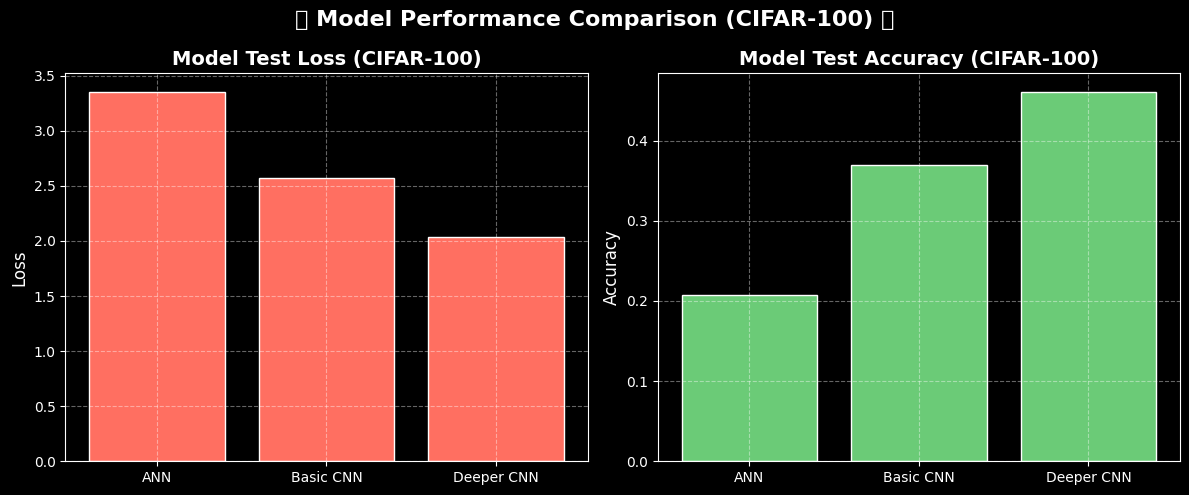

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Load the best weights for each model
ann_model_cifar100.load_weights('best_ann_model_cifar100_weights.weights.h5')
basic_cnn_model_cifar100.load_weights('best_basic_cnn_model_cifar100_weights.weights.h5')
deeper_cnn_model_cifar100.load_weights('best_deeper_cnn_model_cifar100_weights.weights.h5')

# Evaluate the models on the test set
loss_ann_cifar100, accuracy_ann_cifar100 = ann_model_cifar100.evaluate(x_test, y_test, verbose=0)
loss_basic_cnn_cifar100, accuracy_basic_cnn_cifar100 = basic_cnn_model_cifar100.evaluate(x_test, y_test, verbose=0)
loss_deeper_cnn_cifar100, accuracy_deeper_cnn_cifar100 = deeper_cnn_model_cifar100.evaluate(x_test, y_test, verbose=0)

# Print the results
print(f"ANN Model - Test Loss: {loss_ann_cifar100:.4f}, Test Accuracy: {accuracy_ann_cifar100:.4f}")
print(f"Basic CNN Model - Test Loss: {loss_basic_cnn_cifar100:.4f}, Test Accuracy: {accuracy_basic_cnn_cifar100:.4f}")
print(f"Deeper CNN Model - Test Loss: {loss_deeper_cnn_cifar100:.4f}, Test Accuracy: {accuracy_deeper_cnn_cifar100:.4f}")

# Data for comparison plots
models_cifar100 = ['ANN', 'Basic CNN', 'Deeper CNN']
losses_cifar100 = [loss_ann_cifar100, loss_basic_cnn_cifar100, loss_deeper_cnn_cifar100]
accuracies_cifar100 = [accuracy_ann_cifar100, accuracy_basic_cnn_cifar100, accuracy_deeper_cnn_cifar100]

# Dark mode style for plots
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models_cifar100, losses_cifar100, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss (CIFAR-100)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models_cifar100, accuracies_cifar100, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy (CIFAR-100)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison (CIFAR-100) ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

#### 4.2) Model Evaluation (Confusion Matrix & Report - CIFAR-100)

- Predict test images (ANN, Basic CNN, Deeper CNN)
- Convert one-hot labels to integers
- Get predicted labels with `argmax`
- Print confusion matrix & classification report for each model

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
ann_predictions_cifar100 = ann_model_cifar100.predict(x_test)
basic_cnn_predictions_cifar100 = basic_cnn_model_cifar100.predict(x_test)
deeper_cnn_predictions_cifar100 = deeper_cnn_model_cifar100.predict(x_test)

# Convert labels to integers
test_labels_int_cifar100 = np.argmax(y_test, axis=1)

ann_predicted_labels_cifar100 = np.argmax(ann_predictions_cifar100, axis=1)
basic_cnn_predicted_labels_cifar100 = np.argmax(basic_cnn_predictions_cifar100, axis=1)
deeper_cnn_predicted_labels_cifar100 = np.argmax(deeper_cnn_predictions_cifar100, axis=1)

# Confusion matrices (plotting only the best performing model for clarity)
# For CIFAR-100 with 100 classes, a full confusion matrix plot is very large.
# We will only plot the confusion matrix for the best performing model (Basic CNN based on previous run)

# Determine the best performing model based on accuracy
best_model_name = models_cifar100[np.argmax(accuracies_cifar100)]
best_model_predictions = None
best_cm = None

if best_model_name == 'ANN':
    best_model_predictions = ann_predicted_labels_cifar100
    best_cm = confusion_matrix(test_labels_int_cifar100, ann_predicted_labels_cifar100)
elif best_model_name == 'Basic CNN':
    best_model_predictions = basic_cnn_predicted_labels_cifar100
    best_cm = confusion_matrix(test_labels_int_cifar100, basic_cnn_predicted_labels_cifar100)
else: # Deeper CNN
    best_model_predictions = deeper_cnn_predicted_labels_cifar100
    best_cm = confusion_matrix(test_labels_int_cifar100, deeper_cnn_predicted_labels_cifar100)


print(f"\nConfusion Matrix for the Best Performing Model ({best_model_name}):")
# Due to the large size, we'll print the classification report which is more readable for 100 classes
print(classification_report(test_labels_int_cifar100, best_model_predictions, target_names=[f'class_{i}' for i in range(100)]))


# Optional: Plotting a simplified confusion matrix or sample
# This plot will be very dense for 100 classes, consider removing if not useful
# plt.figure(figsize=(12, 10))
# sns.heatmap(best_cm, annot=False, fmt="d", cmap="Blues")
# plt.title(f"Confusion Matrix for {best_model_name} (CIFAR-100)")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Confusion Matrix for the Best Performing Model (Deeper CNN):
              precision    recall  f1-score   support

     class_0       0.69      0.79      0.74       100
     class_1       0.69      0.53      0.60       100
     class_2       0.29      0.38      0.33       100
     class_3       0.26      0.14      0.18       100
     class_4       0.18      0.49      0.26       100
     class_5       0.37      0.30      0.33       100
     class_6       0.43      0.55      0.48       100
     class_7       0.67      0.39      0.49       100
     class_8       0.60      0.61      0.61       100
     class_9       0.71      0.59      0.64       100
    class_10       0.43      0.24      0.31       100
    class_11       0.42      0.14      0.21       100
    class_12       0.49      0.46      0.48       100
    class_13       0.56      0.27      0.36       100
    

#### 4.3) Model Comparison (Training History - CIFAR-100)

- Plot training history for each model (accuracy & loss vs. epochs).
- Helps compare how models learn and generalize over time on CIFAR-100.

In [47]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models_cifar100_history = {
    "ANN": ("cyan", ann_history_cifar100),
    "Basic CNN": ("magenta", basic_cnn_history_cifar100),
    "Deeper CNN": ("yellow", deeper_cnn_history_cifar100)
}

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy (CIFAR-100)', 'Loss (CIFAR-100)'))

for name, (color, history) in models_cifar100_history.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot) - CIFAR-100",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

### 5. Prediction Analysis (CIFAR-100)

This code:
- Uses the trained **Deeper CNN model** (the best performing one on CIFAR-100 based on evaluation) to predict on test images.
- Identifies **correctly** and **incorrectly** classified samples.
- Randomly selects samples for visualization.
- Displays them in a grid, indicating whether the prediction was correct (Green title) or incorrect (Red title with Predicted vs True label).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


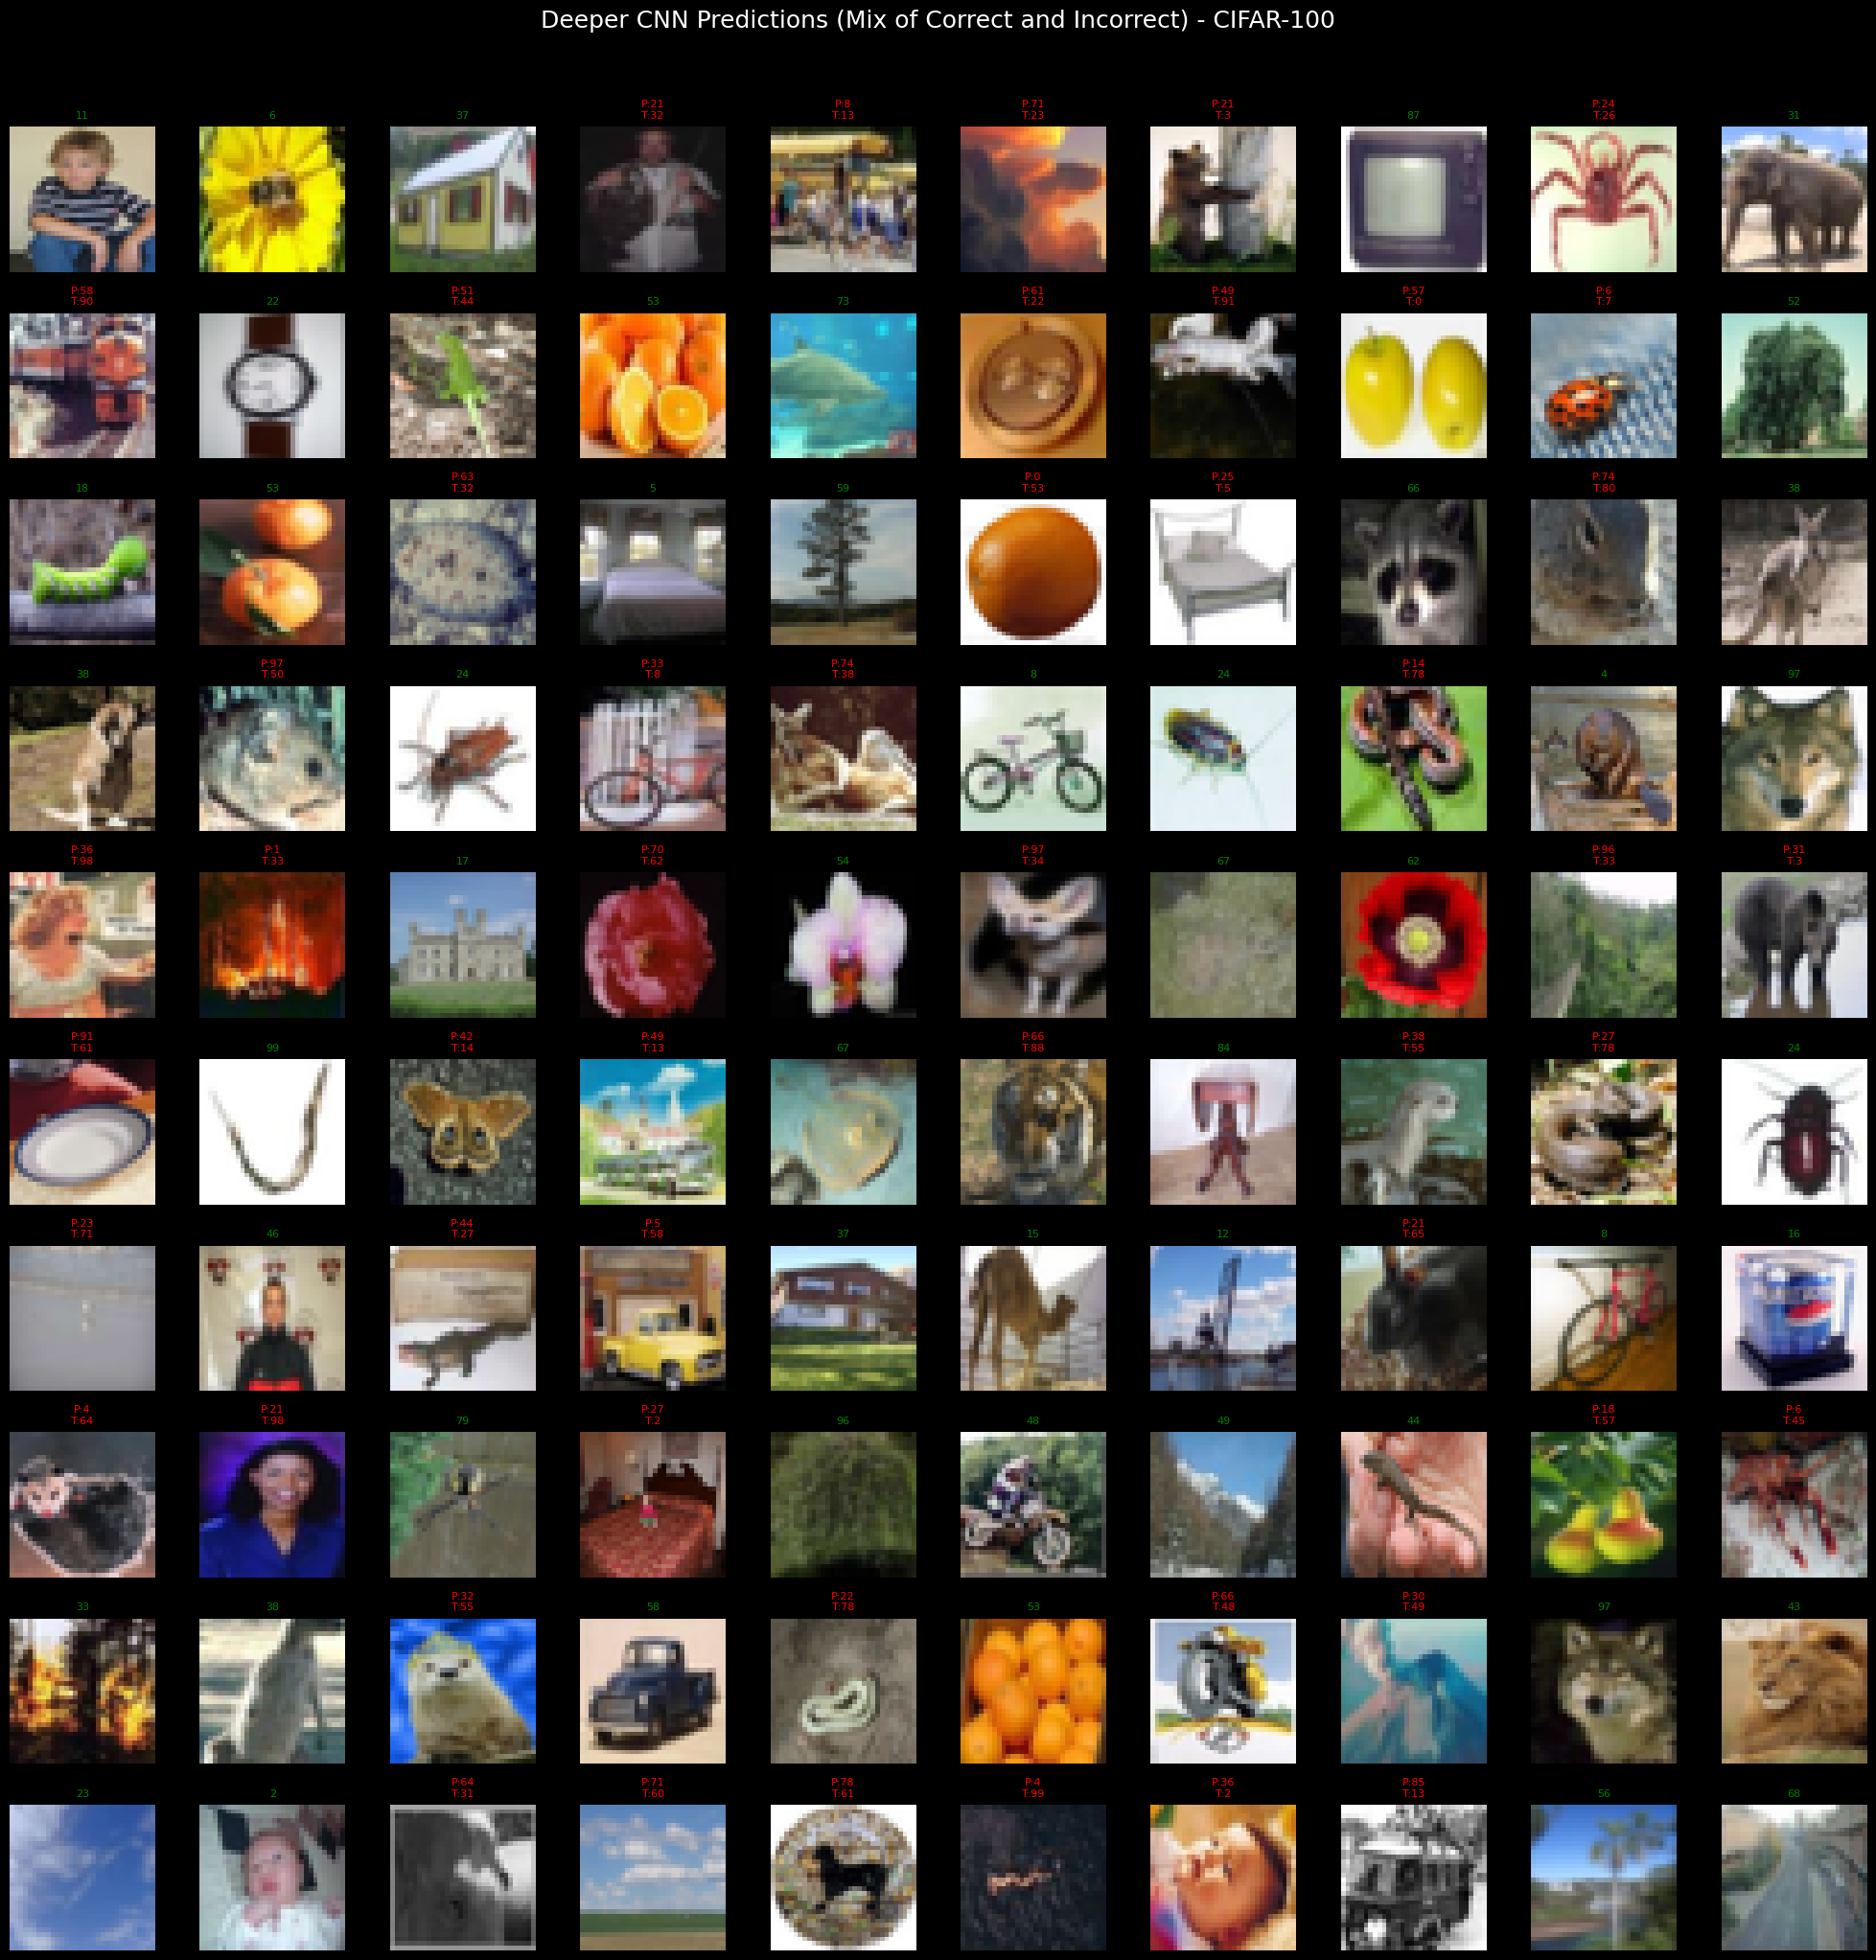

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Use the best performing model for predictions (Deeper CNN based on evaluation)
deeper_cnn_predictions_cifar100 = deeper_cnn_model_cifar100.predict(x_test)
deeper_cnn_predicted_labels_cifar100 = np.argmax(deeper_cnn_predictions_cifar100, axis=1)

# Convert true labels from one-hot to integer
test_labels_int_cifar100 = np.argmax(y_test, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices_cifar100 = np.where(deeper_cnn_predicted_labels_cifar100 == test_labels_int_cifar100)[0]
incorrectly_classified_indices_cifar100 = np.where(deeper_cnn_predicted_labels_cifar100 != test_labels_int_cifar100)[0]

# CIFAR-100 has 100 classes, getting a readable list of class names is more involved.
# For this visualization, we'll just use the class index numbers.
class_names_cifar100 = [str(i) for i in range(100)]


# Select a mix of correctly and incorrectly classified images for visualization
num_correct_to_show_cifar100 = 50  # Reduce number for clarity with 100 classes
num_incorrect_to_show_cifar100 = 50 # Reduce number for clarity with 100 classes

# Ensure we don't try to show more images than available
num_correct_to_show_cifar100 = min(num_correct_to_show_cifar100, len(correctly_classified_indices_cifar100))
num_incorrect_to_show_cifar100 = min(num_incorrect_to_show_cifar100, len(incorrectly_classified_indices_cifar100))


selected_correct_indices_cifar100 = np.random.choice(correctly_classified_indices_cifar100, num_correct_to_show_cifar100, replace=False)
selected_incorrect_indices_cifar100 = np.random.choice(incorrectly_classified_indices_cifar100, num_incorrect_to_show_cifar100, replace=False)

# Combine and shuffle the indices
all_indices_cifar100 = np.concatenate((selected_correct_indices_cifar100, selected_incorrect_indices_cifar100))
np.random.shuffle(all_indices_cifar100)

# Display images in a grid
num_cols_cifar100 = 10
num_rows_cifar100 = (num_correct_to_show_cifar100 + num_incorrect_to_show_cifar100) // num_cols_cifar100
if (num_correct_to_show_cifar100 + num_incorrect_to_show_cifar100) % num_cols_cifar100 != 0:
    num_rows_cifar100 += 1

num_images_to_show_cifar100 = num_correct_to_show_cifar100 + num_incorrect_to_show_cifar100


fig, axes = plt.subplots(num_rows_cifar100, num_cols_cifar100, figsize=(2 * num_cols_cifar100, 2 * num_rows_cifar100))
fig.suptitle(f"{best_model_name} Predictions (Mix of Correct and Incorrect) - CIFAR-100", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices_cifar100[:num_images_to_show_cifar100]):
    row = i // num_cols_cifar100
    col = i % num_cols_cifar100

    # Display the image
    # CIFAR-100 images are color, no need for cmap='gray'
    axes[row, col].imshow(x_test[idx])

    pred_label = deeper_cnn_predicted_labels_cifar100[idx]
    true_label = test_labels_int_cifar100[idx]


    if pred_label == true_label:
        color = "green"
        title = f"{class_names_cifar100[pred_label]}"
    else:
        color = "red"
        title = f"P:{class_names_cifar100[pred_label]}\nT:{class_names_cifar100[true_label]}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()